# Quickstart

### Import and setup wind turbines, site and flow model

In [0]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

In [47]:
from py_wake.examples.data.hornsrev1 import Hornsrev1Site,V80, wt_x, wt_y, wt16_x, wt16_y
from py_wake import NOJ

windTurbines = V80()
site=Hornsrev1Site()
noj = NOJ(site,windTurbines)

### Run model

In [48]:
simulationResult = noj(wt16_x,wt16_y)

### Calculate AEP

In [49]:
print (simulationResult.aep(), "GWh")

143.15156836570176 GWh


### Plot AEP as function of wind turbines, wind direction and wind speed

Text(0, 0.5, 'AEP [GWh]')

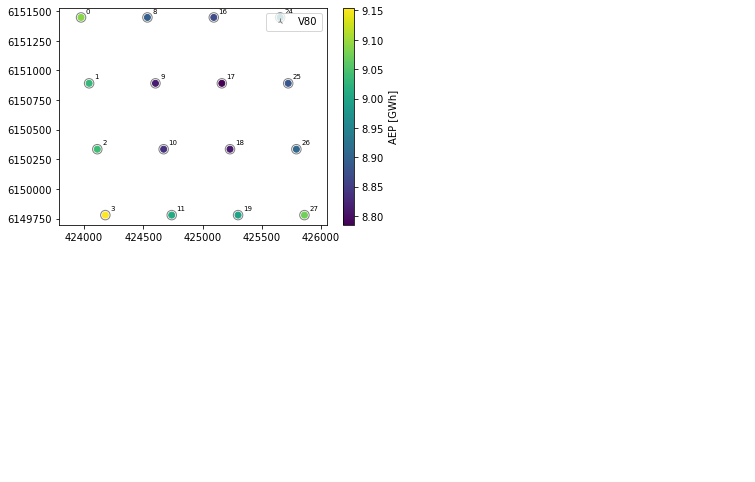

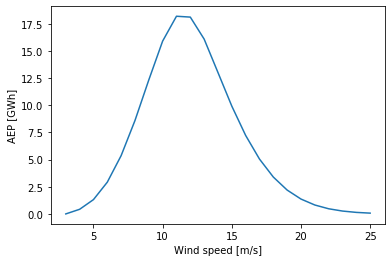

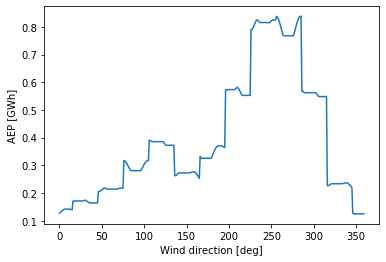

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure()
aep_ilk = simulationResult.aep_ilk() 
windTurbines.plot(wt_x,wt_y)
c =plt.scatter(wt16_x, wt16_y, c=aep_ilk.sum((1,2)))
plt.colorbar(c, label='AEP [GWh]')

plt.figure()
plt.plot(simulationResult.ws, aep_ilk.sum((0,1)))
plt.xlabel("Wind speed [m/s]")
plt.ylabel("AEP [GWh]")

plt.figure()
plt.plot(simulationResult.wd, aep_ilk.sum((0,2)))
plt.xlabel("Wind direction [deg]")
plt.ylabel("AEP [GWh]")

### Plot flow map

<Figure size 432x288 with 0 Axes>

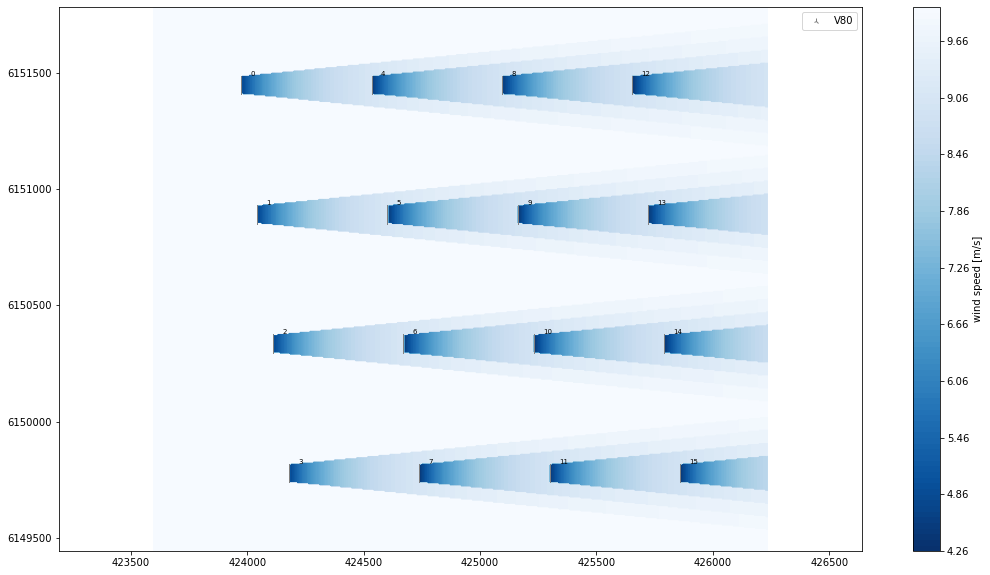

In [46]:
plt.figure()
flow_map = simulationResult.flow_map(ws=10, wd=270)
plt.figure(figsize=(18,10))
flow_map.plot_wake_map()